In [1]:
import pandas as pd
import matplotlib.pyplot as plt

 # Section 1: Business Intelligence

## Part 1

### 1.1.a Import the Dataset

In [5]:
fraudDf = pd.read_csv("databreachcases-cleaned.csv")
fraudDf.head()

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0
1,1/4/2012,SFFireCreditUnionPacifica-CoastsideCreditUnion,CA,PORT,BSF,0.0
2,2/18/2012,BDOUSARubio'sRestaurants,CA,PORT,BSR,0.0
3,2/22/2012,DHIMortgageCompanyLtd.,TX,HACK,BSF,0.0
4,3/12/2012,ImpairmentResourcesLLC,CA,PORT,MED,14000.0


### 1.1.b Quality Assesment

#### 1.1.b.i Check Data Types

In [8]:
fraudDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


date probably needs to become an datetime datatype

#### 1.1.b.ii Check Null Values

In [11]:
fraudDf.isnull().sum()

date       0
company    2
state      0
breach     0
org        0
records    0
dtype: int64

the 2 rows with company null value are fine unless we do any analysis involving company name

#### 1.1.b.iii Summary Statistics

In [14]:
fraudDf.describe()

,records
count,7.084000e+03
mean,8.648893e+05
std,1.996389e+07
min,0.000000e+00
25%,0.000000e+00
50%,8.080000e+02
75%,5.232500e+03
max,1.370000e+09


#### 1.1.b.iv Other Data Understanding Efforts

Since the describe is using scientific notation, it's probably better to visualize records with a boxplot

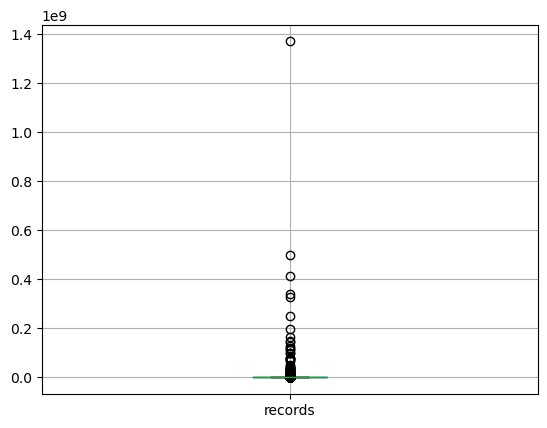

In [17]:
fraudDf.boxplot();
plt.show()

The row with 1.370000e+09 records seems way to high and is likely not a real response so I will drop this row in data cleaning

## Part 2

### 1.2.a Remove Whitespace from Column Names

In [21]:
fraudDf.columns = fraudDf.columns.str.replace(' ', '')
fraudDf.head(1)

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0


### 1.2.b Make Column Names Lowercase

In [23]:
fraudDf.columns = fraudDf.columns.str.lower()
fraudDf.head(1)

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0


### 1.2.c Check Data Types

In [25]:
fraudDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


### 1.2.d Handle Date
#### 1.2.d.i Convert Datatype

In [27]:
fraudDf['date'] = pd.to_datetime(fraudDf['date'], format='%m/%d/%Y')
fraudDf.head(1)

,date,company,state,breach,org,records
0,2006-03-03,PayDayOKLLC,NJ,HACK,BSF,88.0


#### 1.2.d.ii Set Date as Index

In [29]:
fraudDf = fraudDf.set_index('date')
fraudDf.head(1)

,company,state,breach,org,records
date,,,,,
2006-03-03,PayDayOKLLC,NJ,HACK,BSF,88.0


#### 1.2.d.iii Sort Index

In [31]:
fraudDf = fraudDf.sort_index()
fraudDf.head(2)

,company,state,breach,org,records
date,,,,,
2005-01-10,GeorgeMasonUniversity,VA,HACK,EDU,32000.0
2005-01-18,UniversityofCaliforniaSanDiego,CA,HACK,EDU,3500.0


### 1.2.e Rows and Columns

In [33]:
print( 'Rows: ', fraudDf.shape[0])
print( 'Cols: ', fraudDf.shape[1])

Rows:  7084
Cols:  5


### 1.2.f Self-required Cleaning
I'm going to go ahead and drop the na rows just so I don't have to worry about it

In [35]:
fraudDf = fraudDf.dropna()
#There were 2 null values we found above so this should be 7084-2=7082
print( 'Rows: ', fraudDf.shape[0])

Rows:  7082


I also want to remove that outlier in records

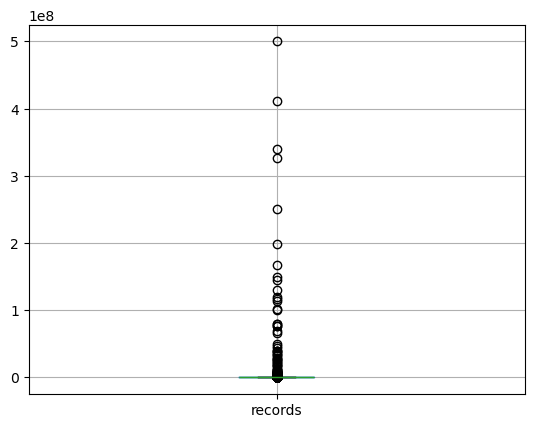

In [37]:
fraudDf = fraudDf[fraudDf['records']< 1.0e+09]
fraudDf.boxplot();
plt.show()

## Part 3 Business Intelligence

### 3.1 Basic Questions
#### 3.1.a Total Records Breached

In [40]:
print(fraudDf['records'].sum(), 'Total Records Breached')

4756873914.0 Total Records Breached


#### 3.1.b Average Records Breached

In [42]:
print(fraudDf['records'].mean(), 'Average Records Breached')

671779.9624346844 Average Records Breached


#### 3.1.c Organizations with the Biggest Breaches

In [44]:
fraudDf.sort_values('records', ascending=False)[["org", "records"]].head(10)

,org,records
date,,
2016-09-22,BSO,500000000.0
2016-11-16,BSO,412000000.0
2018-07-03,BSO,340000000.0
2018-11-30,BSR,327000000.0
2011-04-02,BSO,250000000.0
2017-06-19,BSO,198000000.0
2012-06-06,BSO,167000000.0
2018-03-30,BSR,150000000.0
2017-09-07,BSF,145500000.0


### 3.2 What types of data breaches are more common than others?
#### 3.2.a In terms of the number of incidents

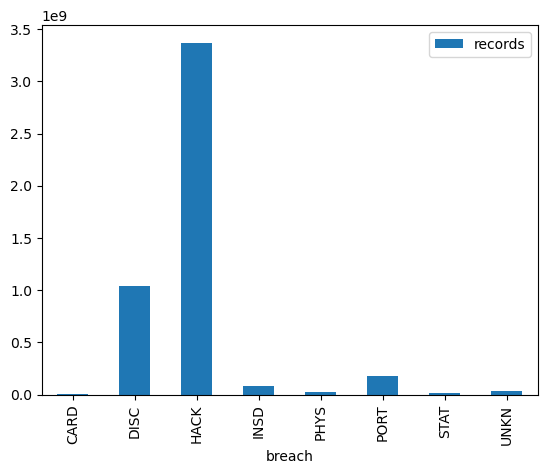

In [46]:
fraudDf.pivot_table(index=["breach"], values="records", aggfunc='sum').plot(kind='bar')
plt.show()

#### 3.2.b In terms of the number of records affected

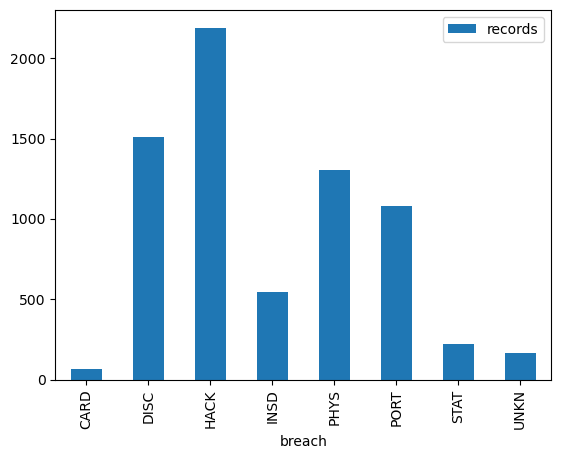

In [48]:
fraudDf.pivot_table(index=["breach"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Hack had by far the most number of incidents and the most numbers of records effected
</div>

### 3.3 What types of organizations are more likely to have a data breach?
#### 3.3.a In terms of the number of incidents

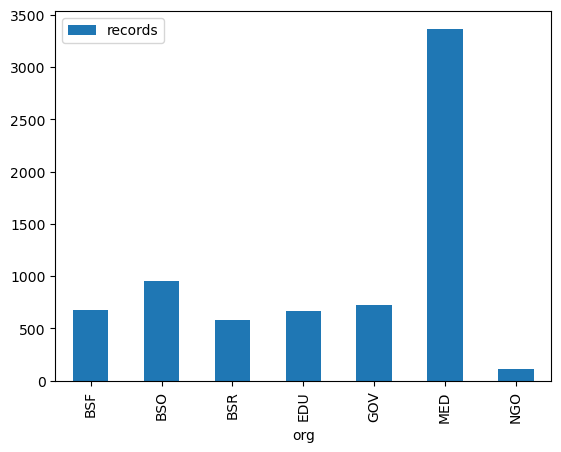

In [51]:
fraudDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

#### 3.3.b In terms of the number of records affected

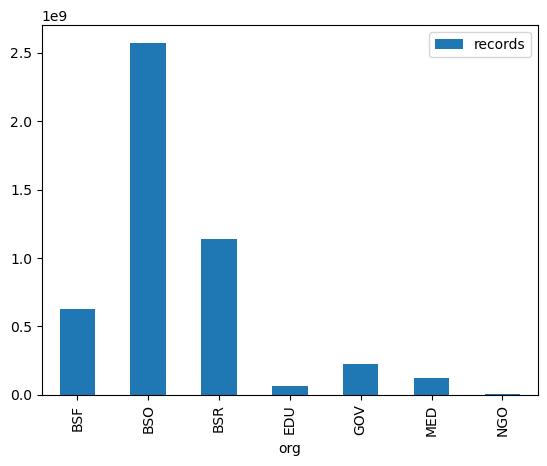

In [53]:
fraudDf.pivot_table(index=["org"], values="records", aggfunc='sum').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Healthcare organizations (MED) were most commonly targeted, but Busnisses in the "Other" category (BSO) were had the most affected records
</div>

### 3.4 States
#### 3.4.a Which States Are Most Likely To Have a Breach

In [56]:
fraudDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False)

,records
state,
CA,1116
NY,521
TX,480
FL,368
MD,306
...,...
Cheshire,1
Tokyo,1
Grand Bahama,1


<div class="alert alert-block alert-info">
<b>Answer:</b> California by far had the most breaches, almost doubling the next closest (New York)
</div>

#### 3.4.b What are the top three states regarding the number of data breaches in 2018?

In [59]:
breaches2018 = fraudDf.loc['2018']
breaches2018.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(3)

,records
state,
CA,78
TX,26
MA,21


<div class="alert alert-block alert-info">
<b>Answer:</b> California, Texas, and Massachusetts had the most breaches in 2018 (in order of most to least)
</div>

### 3.5 Organizations & Data breaches
#### 3.5.a  Which organization type is more vulnerable to “Hackers”?

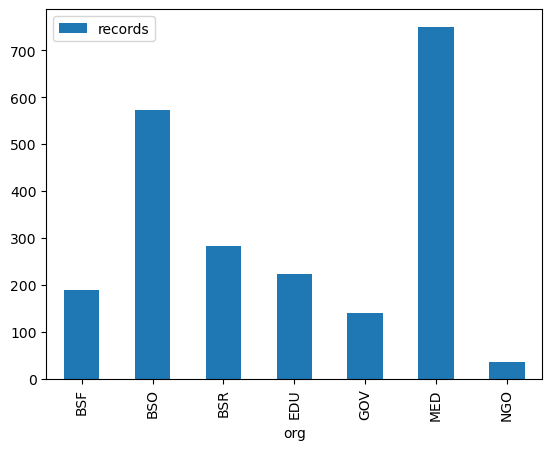

In [62]:
hackersDf = fraudDf[fraudDf["breach"] == "HACK"]
hackersDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Healthcare Organizations (MED) are most vulnerable to hackers
</div>

#### 3.5.b  Which organization type is more vulnerable to “CARD”?

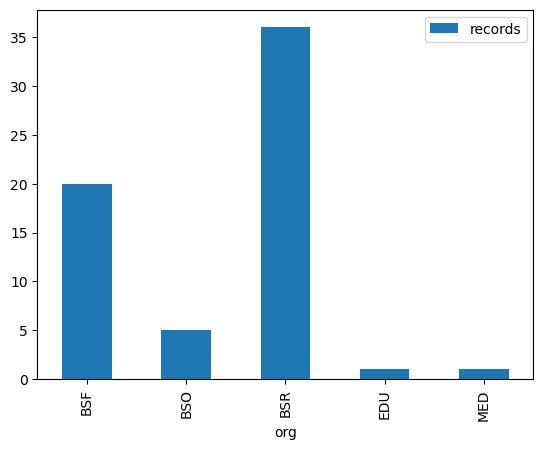

In [64]:
cardDf = fraudDf[fraudDf["breach"] == "CARD"]
cardDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Retail Businesses (BSR) are most vulnerable to CARD
</div>

### 3.6 US states & data breaches
#### 3.6.a Which state is more vulnerable to “Hackers”?

In [66]:
hackersDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(1)

,records
state,
CA,412


<div class="alert alert-block alert-info">
<b>Answer:</b> California most vulnerable to hackers
</div>

#### 3.6.b Which state is more vulnerable to “CARD”?

In [68]:
cardDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(1)

,records
state,
CA,12


<div class="alert alert-block alert-info">
<b>Answer:</b> California most vulnerable to CARD
</div>

### 3.7 Visualize data breaches over time (time series analysis – line chart). 
#### 3.7.a Visualize a time series first.

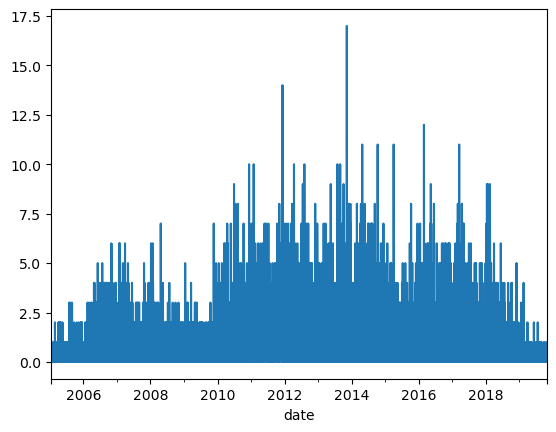

In [70]:
fraudDf.resample('D').size().plot()
plt.show()

This looks like a bar chart because of the all the jumping aroudn but it is a line chart

#### 3.7.b How many breaches per year?

In [72]:
fraudDf.resample('YE').size().sort_values(ascending=False)

date
2012-12-31    749
2014-12-31    741
2011-12-31    690
2013-12-31    682
2010-12-31    677
2016-12-31    612
2017-12-31    587
2006-12-31    440
2015-12-31    426
2007-12-31    389
2018-12-31    385
2008-12-31    309
2009-12-31    218
2005-12-31    118
2019-12-31     58
dtype: int64

### 3.8 Any relationship between time and data breach type? 
#### 3.8.a Has any data breach type increased over time?

In [74]:
fraudDfBreachDummies = pd.get_dummies(fraudDf, columns=['breach'])
fraudDfBreachDummies = fraudDfBreachDummies.drop(columns=["records"])
fraudDfBreachDummies.head()

,company,state,org,breach_CARD,breach_DISC,breach_HACK,breach_INSD,breach_PHYS,breach_PORT,breach_STAT,breach_UNKN
date,,,,,,,,,,,
2005-01-10,GeorgeMasonUniversity,VA,EDU,False,False,True,False,False,False,False,False
2005-01-18,UniversityofCaliforniaSanDiego,CA,EDU,False,False,True,False,False,False,False,False
2005-01-22,UniversityofNorthernColorado,CO,EDU,False,False,False,False,False,True,False,False
2005-02-12,ScienceApplicationsInternationalCorp.(SAIC),CA,BSO,False,False,False,False,False,False,True,False
2005-02-18,UniversityofChicagoHospital,IL,MED,False,False,False,True,False,False,False,False


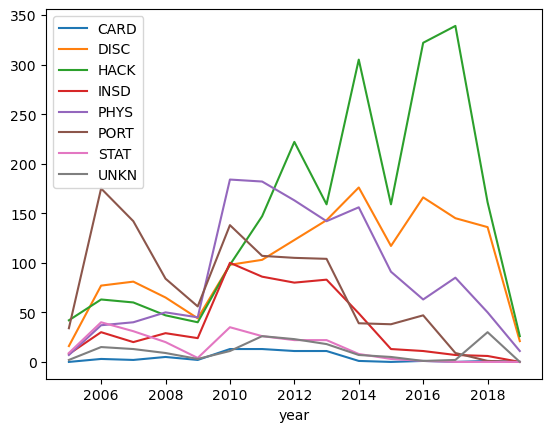

In [75]:
tempDf = fraudDfBreachDummies
tempDf['year'] = tempDf.index.year
breachByYear = tempDf.pivot_table(index="year", values=["breach_CARD", "breach_DISC",	"breach_HACK",	"breach_INSD",	"breach_PHYS",	"breach_PORT",	"breach_STAT",	"breach_UNKN"], aggfunc='sum')
breachByYear.columns = breachByYear.columns.str.replace('breach_', '')
breachByYear.plot()
plt.show()

<div class="alert alert-block alert-info">
<b>Answer A:</b> Hacks(HACK) and Insider Breaches (INSD) are going up
</div>
<div class="alert alert-block alert-info">
<b>Answer B:</b> Physical (PHYS) and portable device (PORT) related breaches are going down
</div>

### 3.9 Organizations that have experienced repeated incidents
#### 3.9.a How many organizations (“company”) have multiple data breaches (more than one data breach since 2005)?

In [77]:
companyPivot = fraudDf.pivot_table(index="company", values="breach", aggfunc="count")
companysMultipleBreach = companyPivot[companyPivot["breach"] > 1]
companysMultipleBreach.shape[0]

185

<div class="alert alert-block alert-info">
<b>Answer:</b> There were 185 companies with multiple breaches
</div>

#### 3.9.b This question extends the previous question a. What organizational or institutional types are closely associated with those organizations having multiple data breaches (more than one data breach between2005 and 2019)? 

In [79]:
companyOrgs = fraudDf[["company", "org"]]
companyOrgs = companyOrgs.reset_index(drop=True)
companyOrgs = companyOrgs.drop_duplicates(subset=['company'])
orgBreaches = companysMultipleBreach.join(companyOrgs.set_index('company')).pivot_table(index="org", values="breach", aggfunc='count')
orgBreaches.sort_values('breach',ascending=False)

,breach
org,
MED,83
BSF,34
BSR,28
BSO,22
GOV,12
EDU,5
NGO,1


<div class="alert alert-block alert-info">
<b>Answer:</b> Health Organizations (MED) had the most companies with multiple breaches, with almost half of companies with multiple breaches falling into that company
</div>

### 3.10 Kansas
#### 3.10.a What are Kansas's top five data breach cases regarding the number of records?

In [81]:
kansasDf = fraudDf[fraudDf['state'] == "KS"]
kansasDf.head()

,company,state,breach,org,records
date,,,,,
2006-01-20,UniversityofKansas(KansasUniversity),KS,DISC,EDU,9200.0
2006-07-18,U.S.DepartmentofAgriculture,KS,PORT,GOV,350.0
2006-08-01,WichitaStateUniversity,KS,HACK,EDU,2000.0
2007-01-28,SalinaRegionalHealthCenter,KS,PORT,MED,1100.0
2007-09-19,KansasUniversity,KS,PHYS,EDU,0.0


In [82]:
kansasDf.sort_values("records", ascending=False).head()

,company,state,breach,org,records
date,,,,,
2017-07-21,KansasDepartmentofCommerce,KS,HACK,GOV,5500000.0
2017-03-27,America'sJobLinkAlliance,KS,HACK,BSO,2100000.0
2016-02-26,ValleyHopeAssociation,KS,PORT,MED,52076.0
2013-10-10,CityofWichita-ElectronicProcurementWebsite,KS,HACK,GOV,29000.0
2018-03-08,KansasDepartmentforAgingandDisabilityServices(...,KS,HACK,GOV,11000.0


<div class="alert alert-block alert-info">
<b>Answer:</b> The top 5 breaches were:
    <ol>
        <li>KS Dept of Commerce in 2017</li>
        <li>Americas job link alliance in 2017</li>
        <li>Valley hope association in 2016</li>
        <li>City of Wichita in 2013</li>
        <li>KS Dept of Aging and Disability Services in 2018</li>
    </ol>
</div>

#### 3.10.b What is the trend of data breaches in Kansas since 2015?

C:\Users\mason\AppData\Local\Temp\ipykernel_27488\3427431982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kansasDf['year'] = pd.to_numeric(kansasDf.index.year)


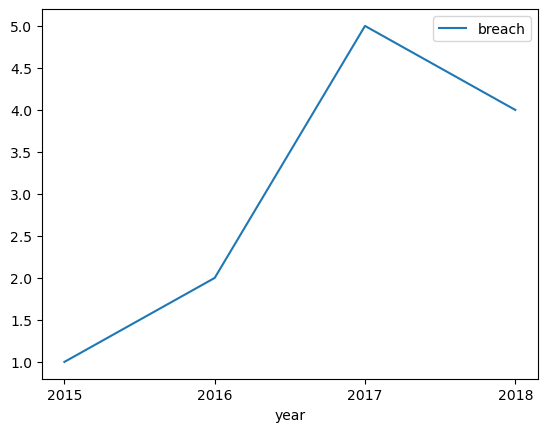

In [84]:
kansasDf['year'] = pd.to_numeric(kansasDf.index.year)
kansasDf = kansasDf[kansasDf['year'] >= 2015]
kansasDf.pivot_table(index="year", values="breach", aggfunc='count').plot().set_xticks([2015, 2016, 2017, 2018])
plt.show()

In [85]:
fraudDf.tail()

,company,state,breach,org,records
date,,,,,
2019-08-19,WesternConnecticutHealthNetwork,CT,DISC,MED,1293.0
2019-08-26,EmployersandLaborersLocals100and397Health&Welf...,MO,HACK,MED,560.0
2019-09-18,WoodRanchMedical,CA,HACK,MED,5835.0
2019-10-03,SanFranciscoDepartmentofPublicHealth,CA,DISC,MED,622.0
2019-10-25,VirginiaDepartmentofBehavioralHealth&Developme...,VA,DISC,MED,1442.0


<div class="alert alert-block alert-info">
<b>Answer:</b> Since there are records from late 2019, we can assume the dataset includes all of the 2018 data, so breaches in kanses peaked in 2017.
</div>

#### 3.10.c Own Question
Since MED organizations have the highest chance of repeat breaches, lets look at the previous question, but filter by MED so we can see how many organizations are at high risk of repeat breaches

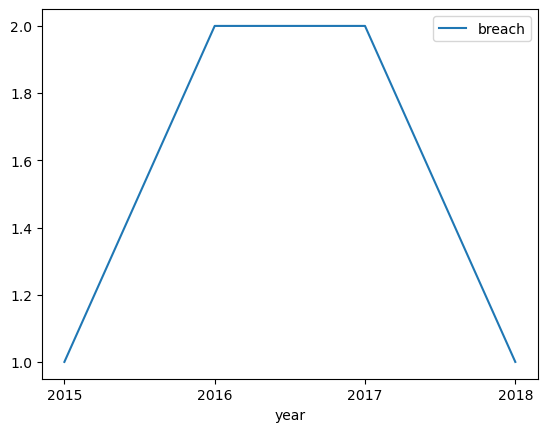

In [87]:
kansasDf = kansasDf[kansasDf["org"] == "MED"]
kansasDf.pivot_table(index="year", values="breach", aggfunc='count').plot().set_xticks([2015, 2016, 2017, 2018])
plt.show()

Looks like there only are 2-6, so lets find them and see where Kansas should focus its cyber security 

In [89]:
tempDf = fraudDf
tempDf['year'] = pd.to_numeric(tempDf.index.year)
tempDf = tempDf[tempDf["state"] == "KS"]
tempDf = tempDf[tempDf["org"] == "MED"]
tempDf = tempDf[tempDf["year"] >= 2015]
tempDf.reset_index()["company"]

0           ClinicalReferenceLaboratory
1                 ValleyHopeAssociation
2                  DecaturHealthSystems
3           FamilyMedicineEastChartered
4    EastCentralKansasAreaAgencyonAging
5           AtchisonHospitalAssociation
Name: company, dtype: object

<div class="alert alert-block alert-info">
<b>Answer:</b> See the about from the cell above for a list of companies in Kansas with a high chance of a second breach
</div>

## Part 4 Storytelling

3 Interesting Findings
* Healthcare orgs having the most repeat breaches was surprising. Considering HIPPA, and the privacy required for healthcare organizations, I would expect after one attack they lock it down.
* It also was a little weird that healthcare organizations had the highest number of breaches but a relatively low number of records affected.
* I would expect education to have a much higher number of records affected considering the number of students that actively attend schools, and the number of students that apply. Also education organizations have a lot of data hackers might want, like email addresses and phone numbers.


# Section 2: Machine Learning

In [93]:
movieDf = pd.read_csv("movie_metadata.csv", encoding='utf-8')
movieDf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [94]:
movieDf.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Part 1 Data Visualization
### 2.1.1 Visualize top 20 movies based on profits

In [96]:
#calculate profit
movieDf["profit"] = movieDf["gross"] - movieDf["budget"]
#Get the top 20 based on profit
top20 = movieDf.sort_values('profit', ascending=False).head(20)
top20

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,502177271.0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,458672302.0
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,449935665.0
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,...,English,USA,PG,10500000.0,1982.0,725.0,7.9,1.85,34000,424449459.0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,403279547.0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,403279547.0
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422783777.0,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,45000000.0,1994.0,886.0,8.5,1.66,17000,377783777.0
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,359544677.0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,348316061.0


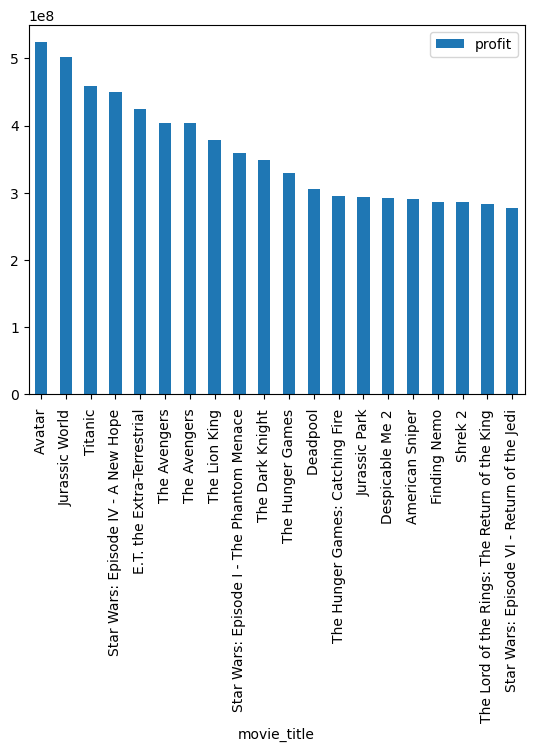

In [97]:
#visualize it
graphTable = top20[["movie_title", "profit"]]
graphTable.set_index('movie_title').plot(kind="bar");
plt.show()

### 2.1.2 Visualize trends over the years
#### Number of movies made

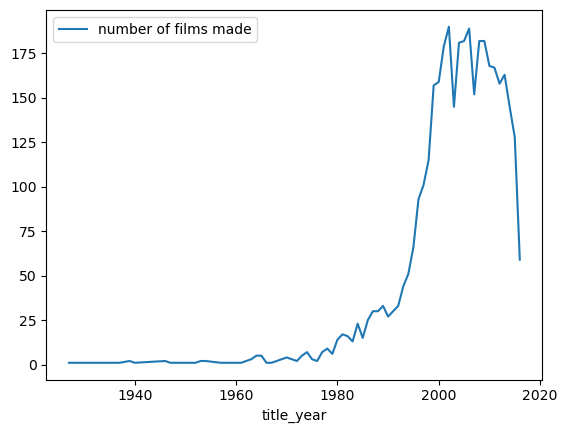

In [99]:
movieDf['title_year'] = movieDf['title_year'].dropna().astype(int)
movieDf.head()
movieDf = movieDf.dropna()
movieDf.pivot_table(index="title_year", values="budget", aggfunc="count").rename(columns={'budget': 'number of films made'}).plot(kind="line");
plt.show()

#### Amount Spent on films

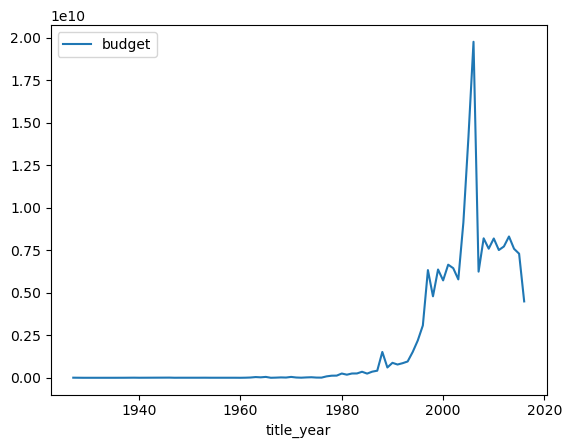

In [101]:
movieDf.pivot_table(index="title_year", values="budget", aggfunc="sum").plot(kind="line");
plt.show()

### 2.1.3 Visualize top 20 Directors with IMDB Scores

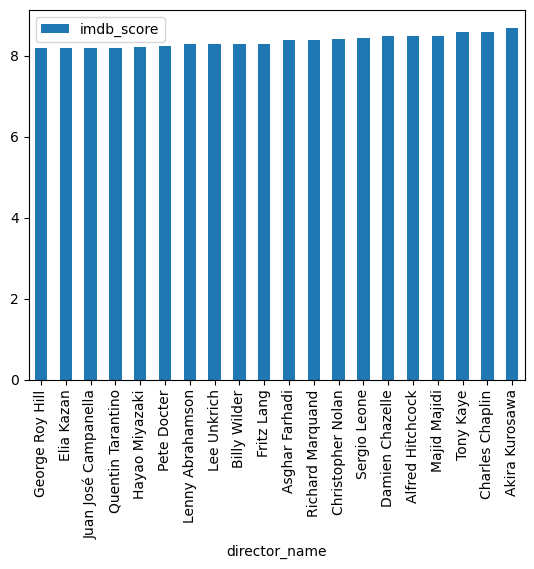

In [103]:
movieDf.pivot_table(index="director_name", values="imdb_score", aggfunc="mean").sort_values("imdb_score").tail(20).plot(kind="bar");
plt.show()

## Part 2 Correlation Analysis
### 2.2.1 Remove Unnecessary Columns

In [105]:
movieDf = movieDf.drop(["movie_title", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "facenumber_in_poster", "movie_imdb_link", "plot_keywords", "genres", "aspect_ratio", "country", "language", "title_year"], axis=1)
movieDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   num_critic_for_reviews     3755 non-null   float64
 2   duration                   3755 non-null   float64
 3   director_facebook_likes    3755 non-null   float64
 4   actor_3_facebook_likes     3755 non-null   float64
 5   actor_1_facebook_likes     3755 non-null   float64
 6   gross                      3755 non-null   float64
 7   num_voted_users            3755 non-null   int64  
 8   cast_total_facebook_likes  3755 non-null   int64  
 9   num_user_for_reviews       3755 non-null   float64
 10  content_rating             3755 non-null   object 
 11  budget                     3755 non-null   float64
 12  actor_2_facebook_likes     3755 non-null   float64
 13  imdb_score                 3755 non-null   float64
 1

I'm dropping:
* Movie_title, the title shouldn't have any effect on it
* director_name: director name shouldn't have any effect
* actor_name: care more about actor likes then actor names
* facenumber in poster: I don't want to consider this considering some movies have multiple posters or multiple actors on the poster
* imdb_link: link shouldn't matter
* plot_keywords: this is too qualitative and the keywords arent defined hard enough
* genres: same thing here
* aspect ratio: I doubt audiences care about aspect ratio as long as it is reasonable
* country: this is just where it was produced, which shouldn't matter. If it was fimled or released I would consider keeping it
* Language: I'm going to assume critics and voters only are voting on movies in languages they understand, so languages shouldn't matter
* title_year: This is a number but its not actually numerical so I'm removing this

I want to calculate average likes for top 3 actors and use that rather then 3 incase in Iron Man Rpbert Downy Junior is actor 1 and in Avengers he is actor 2

In [107]:
movieDf["average_actor_fb_likes"] = (movieDf['actor_1_facebook_likes'] + movieDf['actor_2_facebook_likes']  + movieDf['actor_3_facebook_likes'] )/3
movieDf = movieDf.drop(["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"], axis=1)
movieDf.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,budget,imdb_score,movie_facebook_likes,profit,average_actor_fb_likes
0,Color,723.0,178.0,0.0,760505847.0,886204,4834,3054.0,PG-13,237000000.0,7.9,33000,523505847.0,930.333333
1,Color,302.0,169.0,563.0,309404152.0,471220,48350,1238.0,PG-13,300000000.0,7.1,0,9404152.0,15333.333333
2,Color,602.0,148.0,0.0,200074175.0,275868,11700,994.0,PG-13,245000000.0,6.8,85000,-44925825.0,3851.333333
3,Color,813.0,164.0,22000.0,448130642.0,1144337,106759,2701.0,PG-13,250000000.0,8.5,164000,198130642.0,24333.333333
5,Color,462.0,132.0,475.0,73058679.0,212204,1873,738.0,PG-13,263700000.0,6.6,24000,-190641321.0,600.666667


In [108]:
movieDf.describe()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,average_actor_fb_likes
count,3755.000000,3755.000000,3755.000000,3.755000e+03,3.755000e+03,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3.755000e+03,3755.000000
mean,167.392277,110.260186,807.463648,5.262614e+07,1.058489e+05,11530.158988,336.914514,4.624810e+07,6.464740,9349.396272,6.378045e+06,3515.729783
std,123.465521,22.649332,3068.570417,7.032249e+07,1.520496e+05,19123.805685,411.258897,2.260393e+08,1.055865,21464.027749,2.299496e+08,6188.814757
min,2.000000,37.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,4.000000,2.180000e+02,1.600000,0.000000,-1.221330e+10,0.000000
25%,77.000000,96.000000,11.000000,8.301882e+06,1.966300e+04,1920.500000,110.000000,1.000000e+07,5.900000,0.000000,-1.050726e+07,493.000000
50%,139.000000,106.000000,64.000000,3.009311e+07,5.397700e+04,4060.000000,210.000000,2.500000e+07,6.600000,227.000000,1.610731e+06,892.666667
75%,224.000000,120.000000,235.000000,6.690181e+07,1.286110e+05,16243.000000,398.500000,5.000000e+07,7.200000,11000.000000,2.599272e+07,5039.500000
max,813.000000,330.000000,23000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,9.300000,349000.000000,5.235058e+08,218333.333333


according to IGN the most expensive movie ever is star wars force awakens with a little under $500million, so the movie with a budget of $10 billion is probably a mistake, so I'm going to filter any movies with a budget greater than $500 million out
<a>https://www.ign.com/articles/most-expensive-movies</a>

In [110]:
movieDf = movieDf[movieDf['budget']< 5.0e+08]
movieDf.describe()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,average_actor_fb_likes
count,3745.000000,3745.000000,3745.000000,3.745000e+03,3.745000e+03,3745.000000,3745.000000,3.745000e+03,3745.000000,3745.000000,3.745000e+03,3745.000000
mean,167.468358,110.214419,807.575701,5.276096e+07,1.059905e+05,11555.810147,337.257944,3.902936e+07,6.462830,9367.654473,1.373160e+07,3523.553004
std,123.527001,22.620870,3071.321487,7.036771e+07,1.521910e+05,19142.207739,411.662783,4.397929e+07,1.055924,21488.982885,5.457868e+07,6195.029948
min,2.000000,37.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,4.000000,2.180000e+02,1.600000,0.000000,-3.995457e+08,0.000000
25%,77.000000,96.000000,11.000000,8.406264e+06,1.969900e+04,1936.000000,110.000000,1.000000e+07,5.900000,0.000000,-1.036251e+07,496.000000
50%,139.000000,106.000000,63.000000,3.019910e+07,5.402100e+04,4073.000000,210.000000,2.500000e+07,6.600000,225.000000,1.676553e+06,895.666667
75%,224.000000,120.000000,235.000000,6.706123e+07,1.286820e+05,16264.000000,399.000000,5.000000e+07,7.200000,11000.000000,2.608737e+07,5050.000000
max,813.000000,330.000000,23000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,4.000000e+08,9.300000,349000.000000,5.235058e+08,218333.333333


In [111]:
movieDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3745 entries, 0 to 5042
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3745 non-null   object 
 1   num_critic_for_reviews     3745 non-null   float64
 2   duration                   3745 non-null   float64
 3   director_facebook_likes    3745 non-null   float64
 4   gross                      3745 non-null   float64
 5   num_voted_users            3745 non-null   int64  
 6   cast_total_facebook_likes  3745 non-null   int64  
 7   num_user_for_reviews       3745 non-null   float64
 8   content_rating             3745 non-null   object 
 9   budget                     3745 non-null   float64
 10  imdb_score                 3745 non-null   float64
 11  movie_facebook_likes       3745 non-null   int64  
 12  profit                     3745 non-null   float64
 13  average_actor_fb_likes     3745 non-null   float64
dt

In [137]:
movieDf.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
content_rating               0
budget                       0
imdb_score                   0
movie_facebook_likes         0
profit                       0
average_actor_fb_likes       0
dtype: int64

In [113]:
movieDf.corr(numeric_only=True)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,average_actor_fb_likes
num_critic_for_reviews,1.000000,0.230752,0.175104,0.464424,0.592604,0.236559,0.563859,0.445204,0.348946,0.705701,0.240034,0.226537
duration,0.230752,1.000000,0.181014,0.247961,0.341257,0.121064,0.352969,0.301072,0.367010,0.216698,0.077090,0.115150
director_facebook_likes,0.175104,0.181014,1.000000,0.138461,0.299283,0.118581,0.216796,0.093039,0.192251,0.161888,0.103546,0.115349
gross,0.464424,0.247961,0.138461,1.000000,0.624934,0.234799,0.544585,0.631230,0.216997,0.366840,0.780647,0.212105
num_voted_users,0.592604,0.341257,0.299283,0.624934,1.000000,0.248782,0.778741,0.382984,0.483809,0.517778,0.497114,0.237059
cast_total_facebook_likes,0.236559,0.121064,0.118581,0.234799,0.248782,1.000000,0.178259,0.235526,0.108375,0.205398,0.112937,0.997211
num_user_for_reviews,0.563859,0.352969,0.216796,0.544585,0.778741,0.178259,1.000000,0.402326,0.326227,0.370462,0.377934,0.168269
budget,0.445204,0.301072,0.093039,0.631230,0.382984,0.235526,0.402326,1.000000,0.032234,0.304589,0.008041,0.219268
imdb_score,0.348946,0.367010,0.192251,0.216997,0.483809,0.108375,0.326227,0.032234,1.000000,0.281753,0.253799,0.111490
movie_facebook_likes,0.705701,0.216698,0.161888,0.366840,0.517778,0.205398,0.370462,0.304589,0.281753,1.000000,0.227527,0.193447


Since we are trying to predict IMDB rating, let's only look at that column

In [120]:
movieDf.corr(numeric_only=True)["imdb_score"]

num_critic_for_reviews       0.348946
duration                     0.367010
director_facebook_likes      0.192251
gross                        0.216997
num_voted_users              0.483809
cast_total_facebook_likes    0.108375
num_user_for_reviews         0.326227
budget                       0.032234
imdb_score                   1.000000
movie_facebook_likes         0.281753
profit                       0.253799
average_actor_fb_likes       0.111490
Name: imdb_score, dtype: float64

Looks like the most important indications are:
* number of critics
* duration
* number voted users
* gross income
* number user for reviews
* movie facebook likes
* profit
  

To look at relations between other variables, I'm going to build a heatmap

In [126]:
import seaborn as sns

In [127]:
correlationDf = movieDf.corr(numeric_only=True)
correlationDf

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,average_actor_fb_likes
num_critic_for_reviews,1.000000,0.230752,0.175104,0.464424,0.592604,0.236559,0.563859,0.445204,0.348946,0.705701,0.240034,0.226537
duration,0.230752,1.000000,0.181014,0.247961,0.341257,0.121064,0.352969,0.301072,0.367010,0.216698,0.077090,0.115150
director_facebook_likes,0.175104,0.181014,1.000000,0.138461,0.299283,0.118581,0.216796,0.093039,0.192251,0.161888,0.103546,0.115349
gross,0.464424,0.247961,0.138461,1.000000,0.624934,0.234799,0.544585,0.631230,0.216997,0.366840,0.780647,0.212105
num_voted_users,0.592604,0.341257,0.299283,0.624934,1.000000,0.248782,0.778741,0.382984,0.483809,0.517778,0.497114,0.237059
cast_total_facebook_likes,0.236559,0.121064,0.118581,0.234799,0.248782,1.000000,0.178259,0.235526,0.108375,0.205398,0.112937,0.997211
num_user_for_reviews,0.563859,0.352969,0.216796,0.544585,0.778741,0.178259,1.000000,0.402326,0.326227,0.370462,0.377934,0.168269
budget,0.445204,0.301072,0.093039,0.631230,0.382984,0.235526,0.402326,1.000000,0.032234,0.304589,0.008041,0.219268
imdb_score,0.348946,0.367010,0.192251,0.216997,0.483809,0.108375,0.326227,0.032234,1.000000,0.281753,0.253799,0.111490
movie_facebook_likes,0.705701,0.216698,0.161888,0.366840,0.517778,0.205398,0.370462,0.304589,0.281753,1.000000,0.227527,0.193447


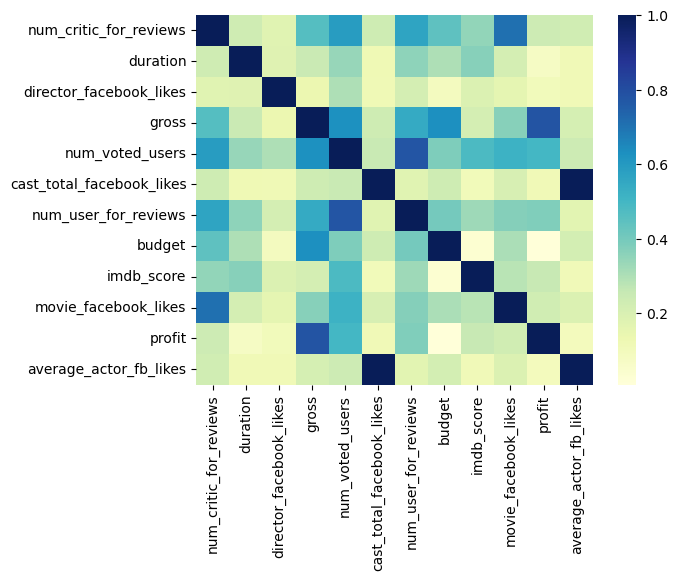

In [128]:
sns.heatmap(correlationDf, cmap="YlGnBu")
plt.show()

### Related Variables
* Gross and Profit (no surpirse)
* Gross and Budget (no surprise since its less than gross and profit)
* Gross and num_voted_users (kinda surprising but it makes sense the more money a movie made indicates more people saw the movie, which means more people could vote for it)
* number of users who voted and number of users who reviewed the movie (no surprise)
* facebook likes and number of critics reviews I can't really explain this correlation, maybe just some random coincidince, maybe more reviewers review more anticipated (not popular/good) movies and facebook likes is a measure of anticipation

### Unrelated Variables
* budget and proft (surprising)

Let's look at dummies

In [133]:
dummies = pd.get_dummies(movieDf)
dummies.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,0.0,760505847.0,886204,4834,3054.0,237000000.0,7.9,33000,...,False,False,False,False,False,True,False,False,False,False


## Part 3 Regression